## Make $\sigma, \sigma_{\mathrm{corr}}$ plots

### sigma corr plotter in single eta region.

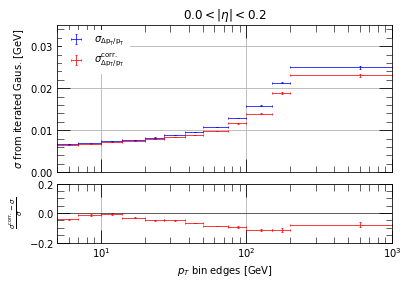

In [9]:
# Jar of pickles.
import pickle
import os
from matplotlib import gridspec
from matplotlib.backends.backend_pdf import PdfPages

import numpy as np
import matplotlib.pyplot as plt

# Local imports.
from Utils_Python.Utils_StatsAndFits import prop_err_x_div_y, prop_err_x_plus_y
from Utils_Python.Utils_Files import makeDirs, check_overwrite
from d0_Utils.d0_fns import calc_x_err_bins_from_bin_edges

#----- Main -----#
inpath_pkl = "/ufrc/avery/rosedj1/HiggsMassMeasurement/d0_Studies/pkl_and_csv/Testing/20200604_combinesamples_applycorr_fastvers_fullstats_2p00sigmas__0p0_eta_2p4__5p0_pT_1000p0_GeV.pkl"
with open(inpath_pkl, "rb") as f:
    dpToverpT_comb_stats_dict = pickle.load(f)

outdir_pdf = "/ufrc/avery/rosedj1/HiggsMassMeasurement/d0_Studies/plots/sigma_itergaus_pTcorr/"
filename = "test05.pdf"

overwrite = False
set_log_x = True

# suffix   = "__{:.1f}_eta_{:.1f}".format(min(eta_ls), max(eta_ls))
# suffix  += "__{:.1f}_pT_{:.1f}_GeV".format(min(pT_ls), max(pT_ls))
# suffix = make_str_title_friendly(suffix)
eta_ls = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.25, 1.5, 1.75, 2.0, 2.1, 2.2, 2.3, 2.4]
pT_ls  = [5.0, 7.0, 10.0, 14.0, 20.0, 27.0, 38.0, 50.0, 75.0, 100.0, 150.0, 200.0, 1000.0]


#----- Automatons -----#
plt.style.use("/home/rosedj1/.config/matplotlib/mpl_configdir/stylelib/cmsstyle_plot.mplstyle")
outpath_pdf = os.path.join(outdir_pdf, filename)
check_overwrite(outpath_pdf, overwrite)

def get_stats_info(eta_bin, pT_bin, stats_dict, stat, hist_type):
    eta_min = eta_bin[0]
    eta_max = eta_bin[1]
    pT_min = pT_bin[0]
    pT_max = pT_bin[1]
    
    key = f"h_{eta_min}eta{eta_max}_{pT_min}pT{pT_max}_combined_{hist_type}"
    return stats_dict[key][stat][-1]

str_sigma = "\sigma_{\mathrm{\Delta p_{T}/p_{T}}}"
str_sigma_corr = "\sigma_{\mathrm{\Delta p_{T}/p_{T}}}^{\mathrm{corr.}}"
color_sigma = "blue"
color_sigma_corr = "red"
markerstyle = "none"
# markerfacecolor = "black"
capsize = 0.75
errlw = markererrw = 0.75

bins = np.array(pT_ls)
x = (bins[1:] + bins[:-1]) / 2.

# Retrieve data.
# 'h_0.2eta0.4_150.0pT200.0_combined_dpToverpT'
# key = f"h_{eta_min}eta{eta_max}_{pT_min}pT{pT_max}_combined_dpToverpT"
# key_corr = key + "corr"
# dpToverpT_comb_stats_dict[key]['mean_ls'][-1]

sigma_ls = []
sigma_corr_ls = []
sigma_err_ls = []
sigma_corr_err_ls = []
for pT_bin in zip(pT_ls[:-1], pT_ls[1:]):
    sig = get_stats_info(eta_bin=[0.0, 0.2], pT_bin=pT_bin, 
                  stats_dict=dpToverpT_comb_stats_dict, stat='std_ls', hist_type="dpToverpT")
    sig_err = get_stats_info(eta_bin=[0.0, 0.2], pT_bin=pT_bin, 
                  stats_dict=dpToverpT_comb_stats_dict, stat='std_err_ls', hist_type="dpToverpT")
    sig_corr = get_stats_info(eta_bin=[0.0, 0.2], pT_bin=pT_bin, 
                  stats_dict=dpToverpT_comb_stats_dict, stat='std_ls', hist_type="dpToverpTcorr")
    sig_corr_err = get_stats_info(eta_bin=[0.0, 0.2], pT_bin=pT_bin, 
                  stats_dict=dpToverpT_comb_stats_dict, stat='std_err_ls', hist_type="dpToverpTcorr")
    
    sigma_ls.append(sig)
    sigma_corr_ls.append(sig_corr)
    sigma_err_ls.append(sig_err)
    sigma_corr_err_ls.append(sig_corr_err)
    

sigma_arr = np.array(sigma_ls)
sigma_corr_arr = np.array(sigma_corr_ls)
sigma_err_arr = np.array(sigma_err_ls)
sigma_corr_err_arr = np.array(sigma_corr_err_ls)

# sigmas_corr = sigmas - 0.05
# sigma_err_arr = np.array(get_stats_info(eta_bin=[0.2, 0.4], pT_bin=[150.0, 200.0], 
#                   stats_dict=dpToverpT_comb_stats_dict, stat='std_err_ls', hist_type="dpToverpT"))
# sigma_corr_err_arr = sigmas_corr * 0.04
#     sigmas = np.array([1, 1.2, 1, 1.2, 0.9, 0.95])
#     sigmas_corr = sigmas - 0.05
#     sigma_err_arr = sigmas*0.06
#     sigma_corr_err_arr = sigmas_corr * 0.04

# with PdfPages(outpath_pdf) as pdf:
# fig = plt.figure(figsize=(12.8, 9.6)) # Build figure

# Design the plot.
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 1], hspace=0.11) # Allow for axes of various sizes
ax = fig.add_subplot(gs[0]) # Build first axis with aspect ratio gs[0]

# ax.text(1500,10**3,"{:.1f}% Retention".format(float(np.shape(btag)[0])/float(np.shape(reco_data['jet_bTagScore'])[0])*100),weight='bold',fontsize=12)
x_min = bins.min()
x_max = bins.max()
x_err_low, x_err_high = calc_x_err_bins_from_bin_edges(bins)

if (set_log_x):
    ax.set_xscale('log')
ax.set_xlim([x_min, x_max])
ax.set_ylim([0, max(sigma_arr.max(), sigma_corr_arr.max())+0.01])
ax.errorbar(x, sigma_arr, xerr=[x_err_low, x_err_high], yerr=sigma_err_arr, label=r"$%s$" % str_sigma, 
            color=color_sigma, mfc=color_sigma, ecolor=color_sigma,
            capsize=capsize, fmt=markerstyle, elinewidth=errlw, mew=markererrw)

ax.errorbar(x, sigma_corr_arr, xerr=[x_err_low, x_err_high], yerr=sigma_corr_err_arr, label=r"$%s$" % str_sigma_corr, 
            color=color_sigma_corr, mfc=color_sigma_corr, ecolor=color_sigma_corr, 
            capsize=capsize, fmt=markerstyle, elinewidth=errlw, mew=markererrw)
#                    mec=color_sigma_corr,

ax.set_ylabel(r'$\sigma$ from iterated Gaus. [GeV]')
ax.set_title(r"$ %.1f < \left|\eta\right| < %.1f$" % (0.0, 0.2))
ax.legend(loc="upper left", framealpha=1)

# ratio_numer, ratio_numer_errs = prop_err_x_plus_y(sigma_corr_arr, -1*sigma_arr)
#----- Overriding ratio_numer_errs with Andrey's formula. -----#
# [X] Confirm that this formula is the same as mine.
# It's not the same, but his uncertainties are smaller. Use his. 
# ratio_numer = sigma_corr_arr - sigma_arr
# ratio_denom = sigma_arr
# ratio_denom_errs = sigma_err_arr

ratio = (sigma_corr_arr - sigma_arr) / sigma_arr
# ratio = np.true_divide(ratio_numer, ratio_denom, out=np.zeros_like(sigma_arr), where=ratio_denom!=0)

# Propagate uncertainties.
# y_vals, y_err_vals = prop_err_x_div_y(ratio_numer, ratio_denom, ratio_numer_errs, ratio_denom_errs)
ratio_err = Andrey_prop_err_on_dsigoversig(sigma_arr, sigma_err_arr, sigma_corr_arr, sigma_corr_err_arr)

ax_ratio = fig.add_subplot(gs[1])
ax_ratio.errorbar(x, ratio, xerr=[x_err_low, x_err_high], yerr=ratio_err, 
                  capsize=capsize, fmt=markerstyle, 
                  mfc=color_sigma_corr, mec=color_sigma_corr, ecolor=color_sigma_corr, 
                  elinewidth=errlw, mew=markererrw)
#                     color=color_dict[count], 
#                         , ms=ms, 
#                         , ,
if (set_log_x):
    ax_ratio.set_xscale('log')
    ax.xaxis.set_major_formatter(plt.NullFormatter())
ax_ratio.set_xlim([x_min, x_max])
ax_ratio.set_xlabel(r'$p_T$ bin edges [GeV]')
ax_ratio.set_ylabel(r'$\frac{\sigma^{\mathrm{corr.}} - \sigma}{\sigma}$')

ax_ratio.set_ylim([-0.2,0.2])
ax_ratio.axhline(y=0, xmin=-1, xmax=10, color='k', lw=0.5, marker=None)
# plt.plot([x_min, x_max], [0,0], color='k', lw=0.5, marker='.')
# plt.tight_layout()
# pdf.savefig()
# plt.clear("all")
# plt.savefig(outpath_pdf)
# plt.clf()